Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might
become 0 and “p” might become 1. This is because your downstream processing in Project 4 using
scikit-learn requires that values be stored as numerics.
• Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and
show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
• Include some text describing your preliminary conclusions about whether either of the other columns
could be helpful in predicting if a specific mushroom is edible or poisonous.

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

toxicity = {'number': {'e': 0, 'p':1}, 'name': {'e': 'Edible', 'p': 'Poisonous'}}

scent = {'number': {'a' : 0,'l' : 1,'c' : 2,'y' : 3,'f' : 4,'m' : 5,'n' : 6,'p' : 7,'s' : 8},
             'name': {'a' : 'Almond','l' : 'Anise','c' : 'Creosote','y' : 'Fishy',
                      'f' : 'Foul','m' : 'Musty','n' : 'None','p' : 'Pungent','s' : 'Spicy'}}

color = {'number': {'k':0,'n':1,'b':2,'h':3,'g':4,'r':5,
         'o':6,'p':7,'u':8,'e':9,'w':10,'y':11},
             'name': {'k':'Black','n':'Brown','b':'Buff','h':'Chocolate','g':'Gray','r':'Green',
         'o':'Orange','p':'Pink','u':'Purple','e':'Red','w':'White','y':'Yellow'}}

cols = ['Tox_Type', 'Odor', 'Gill_Color']
colname = ['Toxicity_Name', 'Odor_Name', 'Gill_Color_Name']

mushrooms = pd.read_table('/Users/aliahsansumon/Desktop/agaricus-lepiota.txt', delimiter=',', header=None, usecols=[0,5,9])
mushrooms.columns = cols

mushrooms2 = mushrooms.copy()
mushrooms2.columns = colname
mushrooms = pd.concat([mushrooms, mushrooms2], axis=1)
mushrooms.Tox_Type = mushrooms.Tox_Type.map(toxicity['number'])
mushrooms.Odor = mushrooms.Odor.map(scent['number'])
mushrooms.Gill_Color = mushrooms.Gill_Color.map(color['number'])
mushrooms.Toxicity_Name = mushrooms.Toxicity_Name.map(toxicity['name'])
mushrooms.Odor_Name = mushrooms.Odor_Name.map(scent['name'])
mushrooms.Gill_Color_Name = mushrooms.Gill_Color_Name.map(color['name'])
mushrooms.head()

,Tox_Type,Odor,Gill_Color,Toxicity_Name,Odor_Name,Gill_Color_Name
0,1,7,0,Poisonous,Pungent,Black
1,0,0,0,Edible,Almond,Black
2,0,1,1,Edible,Anise,Brown
3,1,7,1,Poisonous,Pungent,Brown
4,0,6,0,Edible,None,Black


Text(0, 0.5, 'Count')

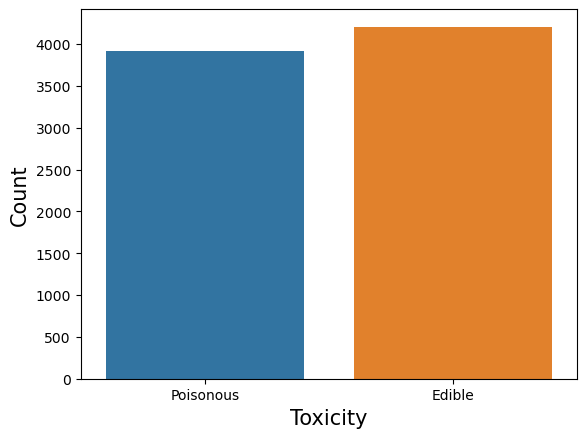

In [8]:
Chart1 = sns.countplot(x="Toxicity_Name", data=mushrooms)
plt.xlabel("Toxicity",size = 15)
plt.ylabel("Count",size = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pungent'),
  Text(1, 0, 'Almond'),
  Text(2, 0, 'Anise'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Foul'),
  Text(5, 0, 'Creosote'),
  Text(6, 0, 'Fishy'),
  Text(7, 0, 'Spicy'),
  Text(8, 0, 'Musty')])

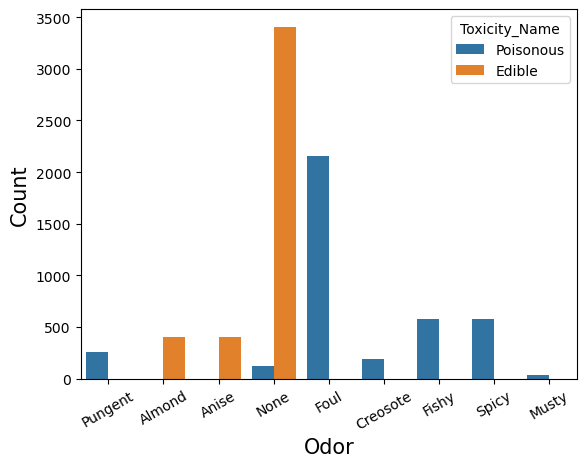

In [9]:
Chart2 = sns.countplot(x="Odor_Name", data=mushrooms, hue='Toxicity_Name')
plt.xlabel("Odor",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Brown'),
  Text(2, 0, 'Gray'),
  Text(3, 0, 'Pink'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Chocolate'),
  Text(6, 0, 'Purple'),
  Text(7, 0, 'Red'),
  Text(8, 0, 'Buff'),
  Text(9, 0, 'Green'),
  Text(10, 0, 'Yellow'),
  Text(11, 0, 'Orange')])

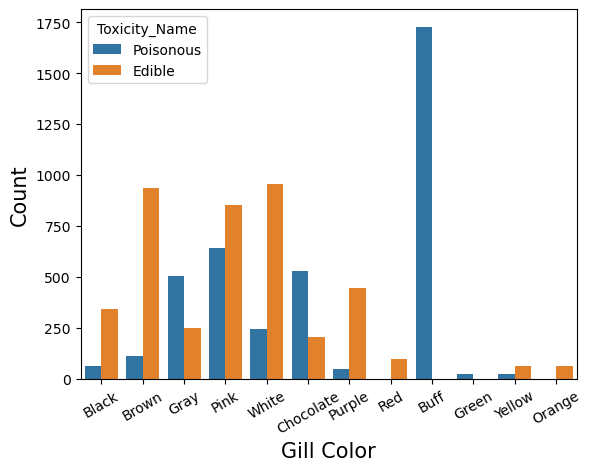

In [10]:
Chart3 = sns.countplot(x="Gill_Color_Name", data=mushrooms, hue='Toxicity_Name')
plt.xlabel("Gill Color",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(rotation=30)